In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Input

In [51]:
data = pd.read_csv("Tesla.csv")

In [53]:
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


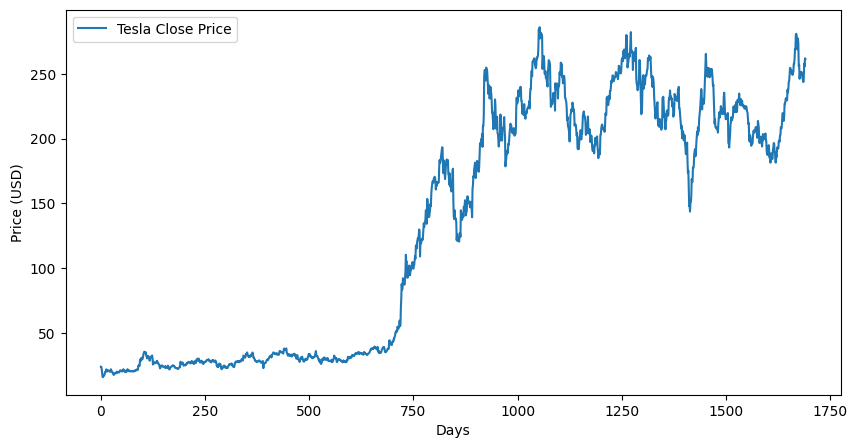

In [54]:
prices = data[['Close']]
plt.figure(figsize=(10,5))
plt.plot(prices, label='Tesla Close Price')
plt.xlabel("Days")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

In [55]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_prices = scaler.fit_transform(prices)

In [56]:
# Function to create dataset
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step), 0])
        y.append(dataset[i+time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_prices, time_step)

In [57]:
X = X.reshape(X.shape[0], X.shape[1], 1)

In [58]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [59]:

model = Sequential()
model.add(Input(shape=(time_step,1)))
model.add(SimpleRNN(50, return_sequences=False))
model.add(Dense(1))


In [60]:

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)        │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=50, batch_size=32, verbose=1)

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1066 - val_loss: 0.0046
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - val_loss: 0.0031
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - val_loss: 0.0028
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010 - val_loss: 0.0015
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.5012e-04 - val_loss: 0.0014
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.8262e-04 - val_loss: 0.0012
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.0690e-04 - val_loss: 0.0011
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.6005e-04 - val_loss: 0.0011
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.1879e-04 - val_loss: 0.0011
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - 

In [62]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [63]:

train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1,1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))


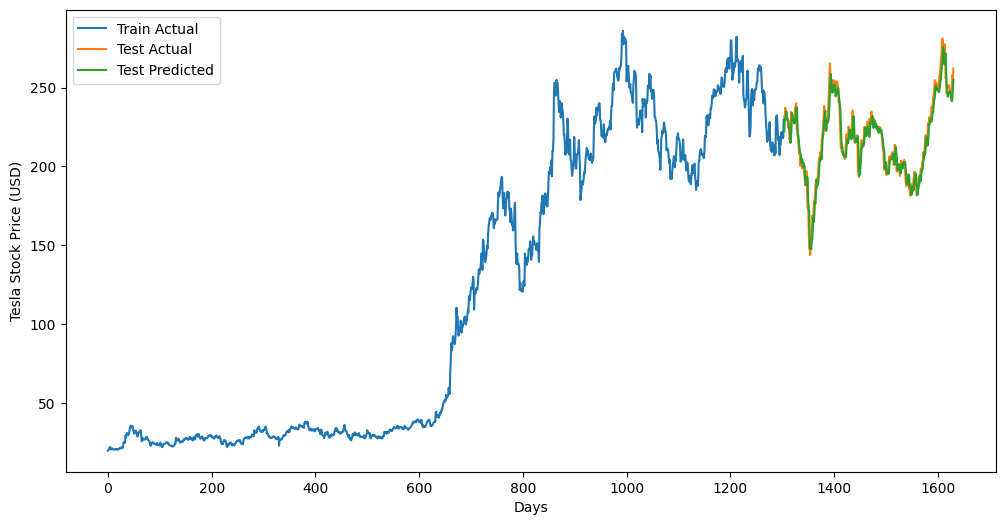

In [64]:
plt.figure(figsize=(12,6))
plt.plot(prices.index[:len(y_train_actual)], y_train_actual, label="Train Actual")
plt.plot(prices.index[len(y_train_actual):len(y_train_actual)+len(y_test_actual)], y_test_actual, label="Test Actual")
plt.plot(prices.index[len(y_train_actual):len(y_train_actual)+len(test_pred)], test_pred, label="Test Predicted")
plt.xlabel("Days")
plt.ylabel("Tesla Stock Price (USD)")
plt.legend()
plt.show()


In [65]:
last_60 = scaled_prices[-time_step:]
last_60 = last_60.reshape(1, time_step, 1)
future_pred = model.predict(last_60)
print("Next Day Prediction:", scaler.inverse_transform(future_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Next Day Prediction: [[258.20447]]


In [66]:
accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {accuracy}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.9851e-04 
Test Loss: 0.0005451696342788637


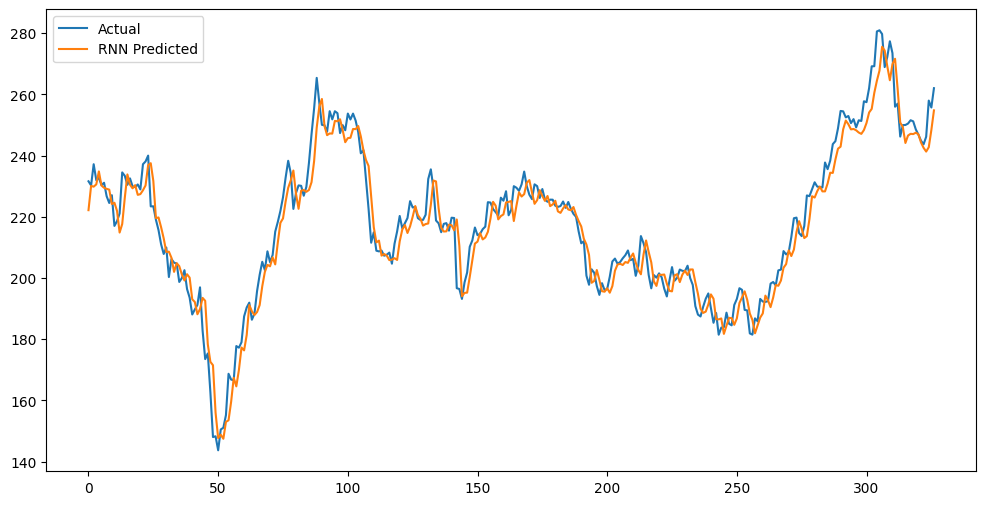

In [67]:
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label="Actual")
plt.plot(test_pred, label="RNN Predicted")
plt.legend()
plt.show()
